In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
import keras

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [5]:
len(df['text'][0])

4930

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
df.dropna(inplace = True)

In [11]:
df.shape

(18285, 5)

In [12]:
y = df['label']
x = df.drop('label',axis = 1)

In [13]:
print(x.shape)
print(y.shape)

(18285, 4)
(18285,)


In [15]:
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot

In [16]:
voc_size = 10000

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
mes = x.copy()

In [19]:
mes.reset_index(inplace = True)

In [24]:
mes.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [25]:
ps = PorterStemmer()
corpus = []
for i in range(0,len(mes)):
    rev = re.sub('[^a-zA-Z]',' ',mes['title'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if not word in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)

In [26]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [27]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]

In [28]:
onehot_repr

[[4344, 7461, 4862, 3200, 2550, 8078, 5057, 8712, 7299, 6234],
 [856, 2006, 8523, 2878, 5666, 5697, 9332],
 [9277, 1633, 6647, 6456],
 [8930, 6337, 4089, 4951, 3930, 5227],
 [8136, 5666, 6539, 2016, 8414, 5047, 5666, 5237, 504, 839],
 [6228,
  3224,
  6395,
  6498,
  9174,
  181,
  4881,
  7545,
  7232,
  9247,
  3877,
  9026,
  1721,
  4292,
  9332],
 [9503, 2200, 5959, 1060, 2208, 7958, 8960, 8378, 4618, 3433, 2718],
 [5768, 8413, 7251, 9669, 5638, 1172, 181, 4607, 4618, 3433, 2718],
 [5313, 440, 1877, 3885, 1395, 2370, 9194, 9989, 181, 8798],
 [1165, 5709, 6437, 7235, 2662, 2192, 5298, 1714],
 [6412, 9099, 567, 7130, 2398, 6647, 5650, 9796, 9864, 3337, 6536],
 [4951, 6833, 2550, 2370, 181, 5638],
 [1430, 1188, 4073, 9736, 3697, 3225, 3021, 2208, 2419],
 [8516, 8366, 2976, 6365, 6835, 4429, 6320, 4618, 3433, 2718],
 [3984, 7164, 3730, 3895, 6960, 4618, 3433, 2718],
 [6206, 2584, 9688, 175, 2072, 913, 675, 7631, 304, 1166],
 [1301, 195, 2006],
 [9122, 109, 2411, 8225, 181, 4528, 1773,

In [29]:
sent_len = 20
embedded_docs = pad_sequences(onehot_repr,padding = 'pre',maxlen = sent_len)
print(embedded_docs)

[[   0    0    0 ... 8712 7299 6234]
 [   0    0    0 ... 5666 5697 9332]
 [   0    0    0 ... 1633 6647 6456]
 ...
 [   0    0    0 ... 4618 3433 2718]
 [   0    0    0 ... 1760 9466 9194]
 [   0    0    0 ... 3973 5859 6258]]


In [30]:
len(embedded_docs)

18285

In [31]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4344,
       7461, 4862, 3200, 2550, 8078, 5057, 8712, 7299, 6234])

In [33]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_len))

In [34]:
model.add(LSTM(100))
model.add(Dense(1,activation ='sigmoid'))

In [36]:
model.compile(loss = 'binary_crossentropy',optimizer ='adam',metrics =['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [40]:
print(x_final.shape)
print(y_final.shape)

(18285, 20)
(18285,)


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size = 0.2)

In [42]:
x_train

array([[   0,    0,    0, ..., 4618, 3433, 2718],
       [   0,    0,    0, ..., 4618, 3433, 2718],
       [   0,    0,    0, ..., 9463,  870, 1011],
       ...,
       [   0,    0,    0, ..., 4618, 3433, 2718],
       [   0,    0,    0, ..., 4618, 3433, 2718],
       [   0,    0,    0, ..., 6350, 3091, 8075]])

In [45]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10,batch_size = 64)

Epoch 1/10
229/229 [==============================] - 18s 54ms/step - loss: 0.2881 - accuracy: 0.8726 - val_loss: 0.1818 - val_accuracy: 0.9248
Epoch 2/10
229/229 [==============================] - 12s 51ms/step - loss: 0.1219 - accuracy: 0.9521 - val_loss: 0.1869 - val_accuracy: 0.9311
Epoch 3/10
229/229 [==============================] - 12s 53ms/step - loss: 0.0773 - accuracy: 0.9731 - val_loss: 0.1752 - val_accuracy: 0.9311
Epoch 4/10
229/229 [==============================] - 12s 53ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 0.2345 - val_accuracy: 0.9297
Epoch 5/10
229/229 [==============================] - 12s 53ms/step - loss: 0.0255 - accuracy: 0.9910 - val_loss: 0.2725 - val_accuracy: 0.9218
Epoch 6/10
229/229 [==============================] - 12s 54ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 0.3357 - val_accuracy: 0.9226
Epoch 7/10
229/229 [==============================] - 12s 53ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.3685 - val_accuracy:

In [73]:
y_pred = model.predict(x_test)>0.5

115/115 [==============================] - 1s 12ms/step


In [74]:
y_pred.astype("int32")

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1882  150]
 [ 119 1506]]


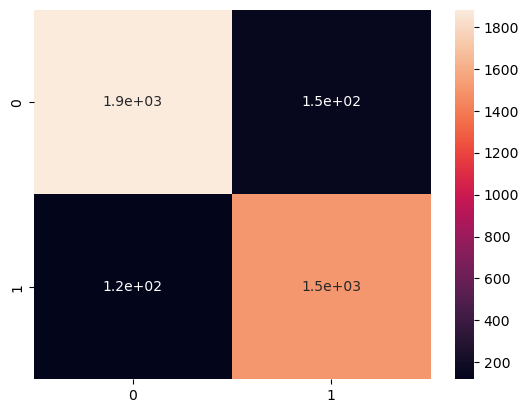

In [79]:
sns.heatmap(cm,annot = True)
plt.show()

In [80]:
import pickle
with open("Fake News Classifier with LSTM",'wb') as f:
    pickle.dump(model,f)